<a href="https://colab.research.google.com/github/gjduart/NN/blob/main/Ex1_PERCEPTRON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alunos: Gabriel Jonas da Silva Duarte, Mayannara Rodrigues


  O Perceptron é um tipo de rede neural artificial artificial 

In [1]:
#DOWNLOAD DADOS OR
!wget --no-check-certificate \
 "https://www.dropbox.com/s/lyluvjascw92dmf/data_or.dat?dl=0" \
 -O  "/content/data_or.dat"




--2020-12-14 16:39:40--  https://www.dropbox.com/s/lyluvjascw92dmf/data_or.dat?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lyluvjascw92dmf/data_or.dat [following]
--2020-12-14 16:39:41--  https://www.dropbox.com/s/raw/lyluvjascw92dmf/data_or.dat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2269f42f4595547b968bfd278f.dl.dropboxusercontent.com/cd/0/inline/BFHjufw6KYQYvXIhDusu2lyb6eU21ouRHY7cDYBBJmqRkjZjvDrI2SD2YmOs7LhiDZoXLeeu_OGTR8hMZNiDmltkrMkklC2oe3guFz6NRJpCNgk8I7ca4NUrGIS9M30bDVw/file# [following]
--2020-12-14 16:39:41--  https://uc2269f42f4595547b968bfd278f.dl.dropboxusercontent.com/cd/0/inline/BFHjufw6KYQYvXIhDusu2lyb6eU21ouRHY7cDYBBJmqRkjZjvDrI2SD2YmOs7LhiDZoXLeeu_OGTR8hMZNiDmltkrMkklC2oe3guFz6NRJpCN

In [3]:
#DOWNLOAD DADOS XOR
!wget --no-check-certificate \
 "https://www.dropbox.com/s/rg6vza4j73yy566/data_xor.dat" \
 -O  "/content/data_xor.dat"


--2020-12-14 16:39:50--  https://www.dropbox.com/s/rg6vza4j73yy566/data_xor.dat
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/rg6vza4j73yy566/data_xor.dat [following]
--2020-12-14 16:39:51--  https://www.dropbox.com/s/raw/rg6vza4j73yy566/data_xor.dat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5fbc47b6eb58dd77d79294e197.dl.dropboxusercontent.com/cd/0/inline/BFGdgmFI_x_UGteT9KV88ClQpy4l5L_G98oAlsGZYHq1U7LhEatEiU_5JhIWBNgTEnZfKKyXvfaKb_e-Kx6RWx9Dz1FtZGb28p9DUkIl6LTcFr6Dhk9ZHts9JgxbBIIbgmc/file# [following]
--2020-12-14 16:39:51--  https://uc5fbc47b6eb58dd77d79294e197.dl.dropboxusercontent.com/cd/0/inline/BFGdgmFI_x_UGteT9KV88ClQpy4l5L_G98oAlsGZYHq1U7LhEatEiU_5JhIWBNgTEnZfKKyXvfaKb_e-Kx6RWx9Dz1FtZGb28p9DUkIl6LTcFr6

<h4>Vamos importar as bibliotecas nescessárias.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Vamos carregar os nossos dados, por convenção usamos utilizamremos as variaveis da seguinte forma: $\textbf{dados}$ para os dados OR e $dados\_ xor$ para os dados XOR.

In [5]:
# Carregando dados OR

data_or = np.genfromtxt('data_or.dat')
x = data_or[:,:2]
y = data_or[:,2]
y = y.astype(np.integer)
# Carregando dados XOR

data_xor = np.genfromtxt('data_xor.dat')
x_xor= data_xor[:,:2]
y_xor = data_xor[:,2]
y_xor = y_xor.astype(np.integer)

Sobre a função de ativação escolhida para o perceptron decidimos usar a tangente hiperbólica.

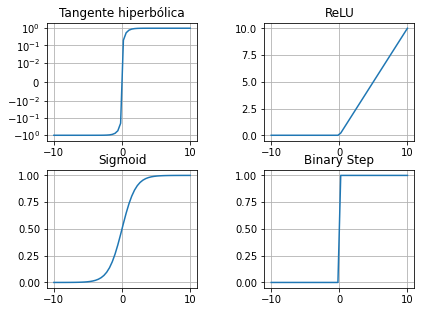

In [6]:
exemplo = np.linspace(-10, 10)
plt.figure()
plt.subplot(221)
plt.plot(exemplo, np.tanh(exemplo))
plt.yscale('symlog', linthreshy=0.01)
plt.title('Tangente hiperbólica')
plt.grid(True)

plt.subplot(222)
plt.plot(exemplo, np.maximum(0,exemplo))
plt.title('ReLU')
plt.grid(True)

plt.subplot(223)
plt.plot(exemplo, 1/(1+np.exp(-exemplo)))
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(224)
plt.plot(exemplo, np.heaviside(exemplo,1))
plt.title('Binary Step')
plt.grid(True)



plt.subplots_adjust(top=0.92, bottom=0.0001, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.45)

plt.show()

Vamos iniciar a classe perceptron


In [7]:
class Perceptron(object):
# Definimos como default a taxa de aprendizagem e as epocas 
  def __init__(self, taxa_aprendizagem=0.01,epocas=100):  
    self.epocas = epocas
    self.taxa_aprendizagem = taxa_aprendizagem


# A nossa função de agregação, faz o produto interno e adiciona o bias  def funcao_agregacao(self, X):
  def funcao_agregacao(self,X):
    z = np.dot(X, self.W) + self.bias 
    return z

# Definindo a nossa função de ativação
  def hyperbolic_tangent(self,X):
    return np.tanh(self.funcao_agregacao(X))

# Função para realizar as predições
  def predict(self,X):
    return self.hyperbolic_tangent(X)

# Função para realizar o treinamento
  def treinar(self, X, y):

    self.bias = np.random.uniform(-1, 1)
    self.W = np.random.uniform(-1, 1, (X.shape[1]))
  
    self.errors = []
    for epoca in range(self.epocas):
      errors = 0

      for xi, target in zip(X, y):
        output = self.predict(xi)
        update = self.taxa_aprendizagem * (target - output) #learning_rate * Error 
        self.W = self.W + update * xi  #W +learning_rate * error * xi
        self.bias = self.bias + update   #Bias + learning_rate*error 
        errors += (update != 0.0).astype(int)
      self.errors.append(errors)
      #print(f'Epoca: {epoca}'  )
    




Agora será realizado o treinamento e a plotagem da superfície de decisão para os dados de OR e XOR

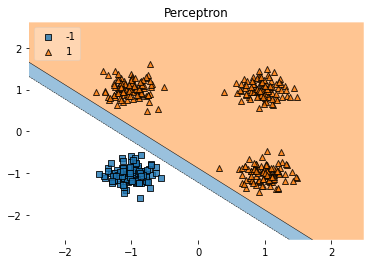

In [8]:
model = Perceptron()
treinamento = model.treinar(x,y)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y, clf=model, legend=2)

plt.title('Perceptron')
plt.show()

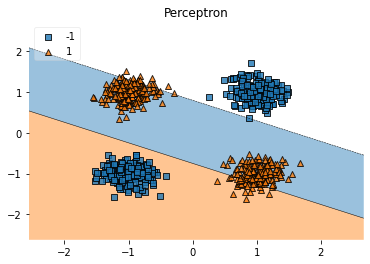

In [9]:
model.treinar(x_xor,y_xor)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_xor, y_xor, clf=model, legend=2)

plt.title('Perceptron')
plt.show()